In [54]:
import pandas as pd

In [55]:
df = pd.read_csv('diabetes.csv')

In [56]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

Hasil Outcome menyatakan tidak seimbang terdiri dari non diabetes 500 dan yang diabetes 268

In [58]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Terdapat beberapa nilai yg seharusnya seperti nilai yang tidak mungkin memiliki nilai nol (0) seperti Glucose, BloodPressure, SkinThickness, Insulin, dan BMI. 

In [61]:
import numpy as np

In [62]:
(df[['Glucose','BMI','Insulin','BloodPressure','SkinThickness']] == 0).sum()

Glucose            5
BMI               11
Insulin          374
BloodPressure     35
SkinThickness    227
dtype: int64

In [63]:
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)

Dilakukan perubahan terhadap data Glucose, BMI, Insulin, BloodPressure, dan juga SkinThickness yang memiliki nilai nol (0) diubah menjadi Null atau nan agar tidak mengganggu pada saat tahap selanjutnya

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

C:\Users\Rai\AppData\Local\Temp\ipykernel_10932\548246259.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outcome', y='BMI', palette='Set2')


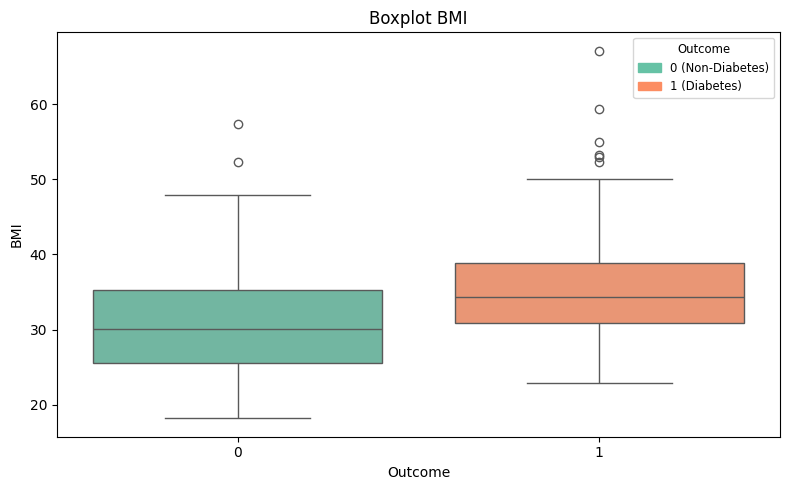

In [65]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Outcome', y='BMI', palette='Set2')
plt.title('Boxplot BMI')
plt.xlabel('Outcome')
plt.ylabel('BMI')
plt.tight_layout()
legend_labels = [
    mpatches.Patch(color='#66c2a5', label='0 (Non-Diabetes)'),
    mpatches.Patch(color='#fc8d62', label='1 (Diabetes)')
]
plt.legend(
    handles=legend_labels,
    title='Outcome',
    loc='upper right',
    fontsize='small',
    title_fontsize='small'
)
plt.show()

Kelompok diabetik (Outcome = 1) memiliki nilai BMI yang cenderung lebih tinggi dibandingkan dengan kelompok non-diabetik. Hal ini ditunjukkan oleh nilai median BMI kelompok diabetik yang berada di sekitar 34, sedangkan kelompok non-diabetik memiliki median sekitar 30. Selain itu, kelompok diabetik menunjukkan jumlah outlier yang lebih banyak, terutama pada nilai BMI ekstrem di atas 50, bahkan mendekati 70. Kondisi ini mengindikasikan adanya potensi risiko komplikasi serius pada individu dengan diabetes.
Sebaran data pada kelompok diabetik juga tampak lebih lebar, yang mencerminkan variasi berat badan yang lebih besar di antara individu dalam kelompok tersebut. Temuan ini menunjukkan bahwa individu dengan berat badan berlebih atau indeks massa tubuh (Body Mass Index/BMI) yang tinggi memiliki risiko yang lebih besar untuk menderita diabetes.


C:\Users\Rai\AppData\Local\Temp\ipykernel_10932\811536130.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outcome', y='Age', palette='Set2')


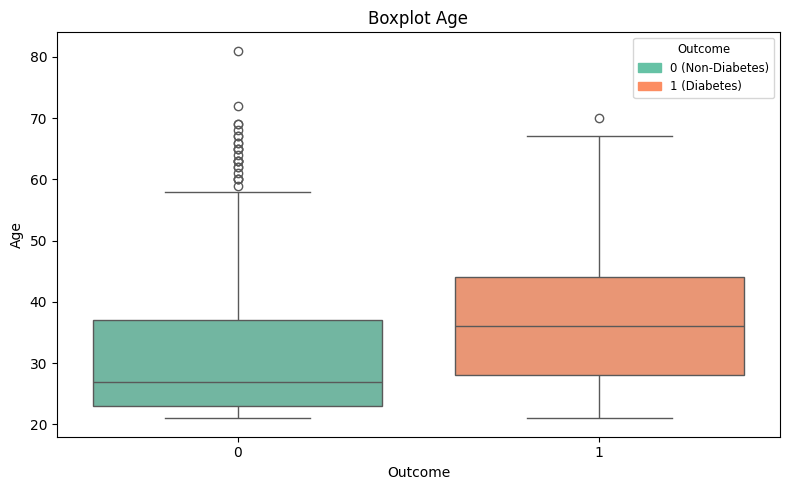

In [66]:

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Outcome', y='Age', palette='Set2')
plt.title('Boxplot Age')
plt.xlabel('Outcome')
plt.ylabel('Age')
plt.tight_layout()
legend_labels = [
    mpatches.Patch(color='#66c2a5', label='0 (Non-Diabetes)'),
    mpatches.Patch(color='#fc8d62', label='1 (Diabetes)')
]
plt.legend(
    handles=legend_labels,
    title='Outcome',
    loc='upper right',
    fontsize='small',
    title_fontsize='small'
)
plt.show()

Kelompok non-diabetik (Outcome = 0) umumnya terdiri dari individu yang berusia lebih muda, dengan kuartil pertama (Q1) berada pada awal usia 20-an, nilai median sekitar 27 tahun, dan kuartil ketiga (Q3) di pertengahan usia 30-an. Meskipun terdapat beberapa outlier hingga usia mendekati 80 tahun, jumlahnya relatif sedikit.
Sebaliknya, kelompok diabetik (Outcome = 1) memiliki nilai median usia yang lebih tinggi, yaitu berada pada pertengahan hingga akhir usia 30-an, serta menunjukkan sebaran yang lebih luas. Jumlah outlier pada kelompok ini lebih sedikit, meskipun tetap terdapat individu dengan usia hingga 70-an. Temuan ini mengindikasikan bahwa dalam dataset yang dianalisis, risiko diabetes cenderung meningkat seiring dengan bertambahnya usia.


C:\Users\Rai\AppData\Local\Temp\ipykernel_10932\2167575599.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outcome', y='DiabetesPedigreeFunction', palette='Set2')


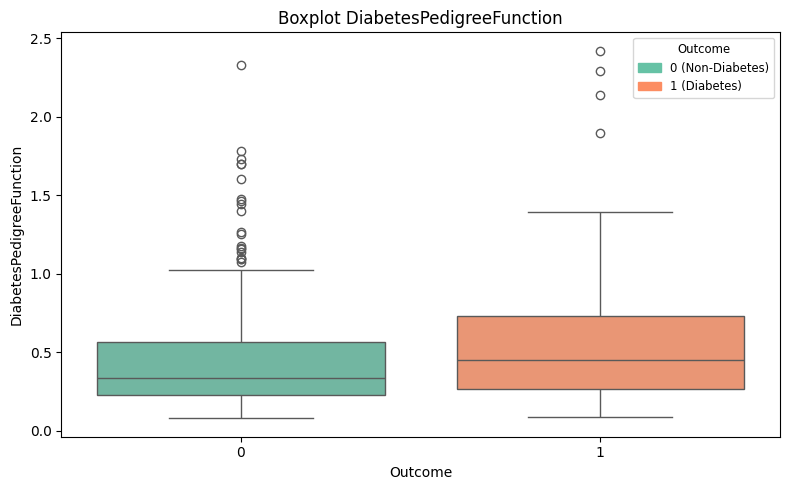

In [67]:

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Outcome', y='DiabetesPedigreeFunction', palette='Set2')
plt.title('Boxplot DiabetesPedigreeFunction')
plt.xlabel('Outcome')
plt.ylabel('DiabetesPedigreeFunction')
plt.tight_layout()
legend_labels = [
    mpatches.Patch(color='#66c2a5', label='0 (Non-Diabetes)'),
    mpatches.Patch(color='#fc8d62', label='1 (Diabetes)')
]
plt.legend(
    handles=legend_labels,
    title='Outcome',
    loc='upper right',
    fontsize='small',
    title_fontsize='small'
)
plt.show()

Pada kelompok non-diabetik (Outcome = 0), nilai Diabetes Pedigree Function umumnya berada pada rentang antara 0,2 hingga 0,6, dengan nilai median sekitar 0,35. Meskipun terdapat beberapa outlier dengan nilai di atas 2,0, sebagian besar nilai tetap berada di bawah 1,0, yang mengindikasikan riwayat keluarga terhadap diabetes yang relatif lemah.
Sementara itu, pada kelompok diabetik (Outcome = 1), distribusi Diabetes Pedigree Function bergeser ke arah kanan dengan nilai median yang lebih tinggi, yakni di kisaran 0,45, serta rentang interkuartil yang lebih lebar. Beberapa outlier bahkan tercatat melebihi angka 2,0. Temuan ini menunjukkan bahwa semakin kuat riwayat diabetes dalam keluarga, semakin tinggi pula risiko individu tersebut untuk menderita diabetes.


C:\Users\Rai\AppData\Local\Temp\ipykernel_10932\2852972961.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outcome', y='Insulin', palette='Set2')


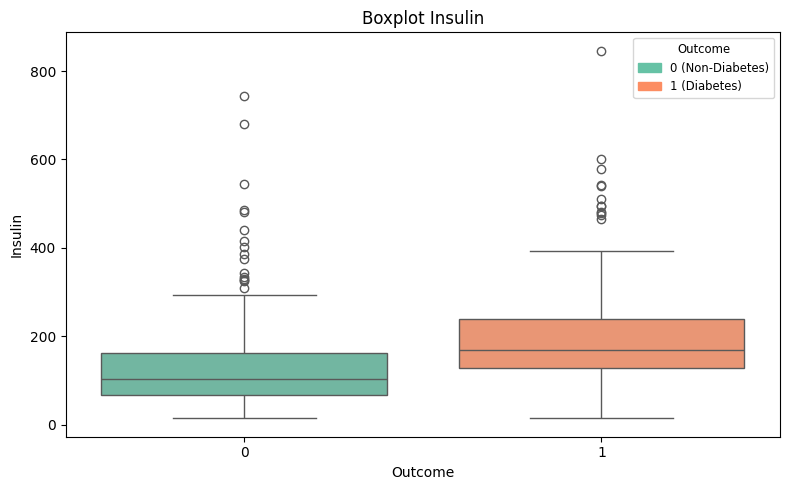

In [68]:

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Outcome', y='Insulin', palette='Set2')
plt.title('Boxplot Insulin')
plt.xlabel('Outcome')
plt.ylabel('Insulin')
plt.tight_layout()
legend_labels = [
    mpatches.Patch(color='#66c2a5', label='0 (Non-Diabetes)'),
    mpatches.Patch(color='#fc8d62', label='1 (Diabetes)')
]
plt.legend(
    handles=legend_labels,
    title='Outcome',
    loc='upper right',
    fontsize='small',
    title_fontsize='small'
)
plt.show()

Kelompok non-diabetik (Outcome = 0) memiliki median insulin sekitar 100, lebih rendah dibandingkan kelompok diabetik (Outcome = 1) dengan median mendekati 180. Sebaran pada kelompok diabetik lebih lebar dengan banyak outlier, termasuk nilai ekstrem di atas 800, sedangkan kelompok non-diabetik cenderung lebih rapat dan simetris.
Perbedaan ini mengindikasikan adanya hubungan antara tingginya kadar insulin dengan kejadian diabetes. Namun, keberadaan nilai insulin nol atau mendekati nol perlu dicermati karena berpotensi mencerminkan data hilang atau tidak tercatat.

C:\Users\Rai\AppData\Local\Temp\ipykernel_10932\443468007.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outcome', y='SkinThickness', palette='Set2')


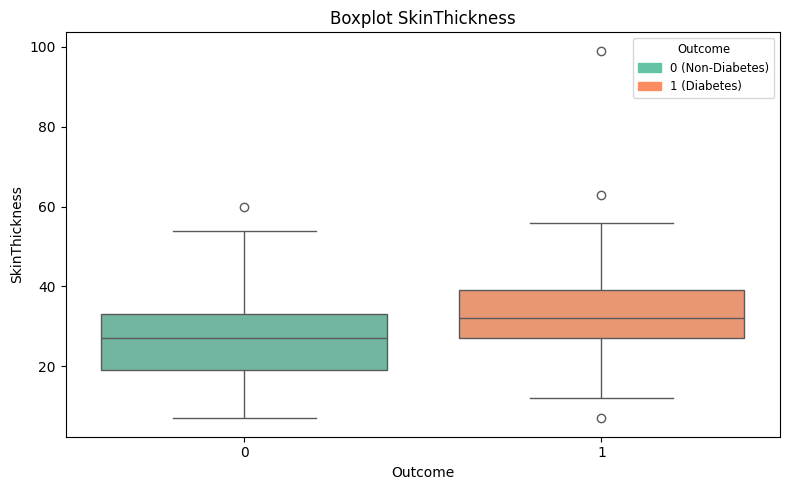

In [69]:

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Outcome', y='SkinThickness', palette='Set2')
plt.title('Boxplot SkinThickness')
plt.xlabel('Outcome')
plt.ylabel('SkinThickness')
plt.tight_layout()
legend_labels = [
    mpatches.Patch(color='#66c2a5', label='0 (Non-Diabetes)'),
    mpatches.Patch(color='#fc8d62', label='1 (Diabetes)')
]
plt.legend(
    handles=legend_labels,
    title='Outcome',
    loc='upper right',
    fontsize='small',
    title_fontsize='small'
)
plt.show()

Kelompok diabetik (Outcome = 1) memiliki median skin thickness lebih tinggi (±32) dibandingkan kelompok non-diabetik (Outcome = 0) yang berada di kisaran 27. Distribusi pada kelompok diabetik juga menunjukkan lebih banyak outlier ekstrem, termasuk nilai mendekati 100.
Sebaliknya, kelompok non-diabetik memiliki distribusi lebih stabil dengan rentang sempit. Temuan ini mengindikasikan bahwa ketebalan lipatan kulit dapat menjadi indikator potensial risiko diabetes.


C:\Users\Rai\AppData\Local\Temp\ipykernel_10932\1536455345.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outcome', y='BloodPressure', palette='Set2')


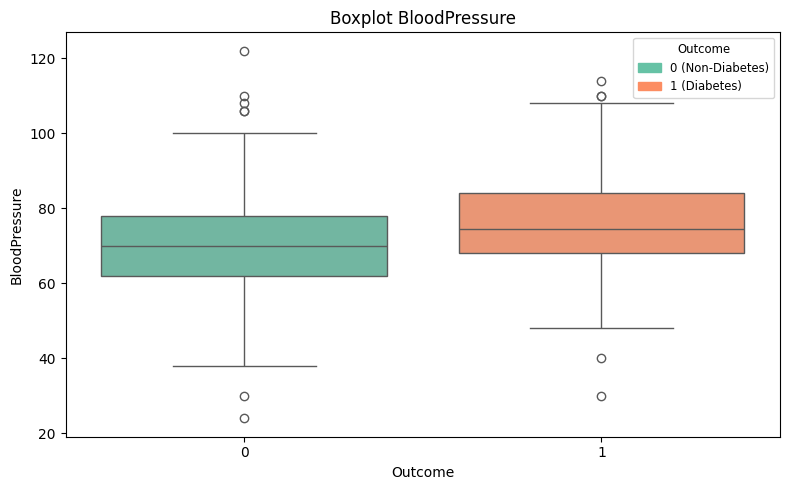

In [70]:

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Outcome', y='BloodPressure', palette='Set2')
plt.title('Boxplot BloodPressure')
plt.xlabel('Outcome')
plt.ylabel('BloodPressure')
plt.tight_layout()
legend_labels = [
    mpatches.Patch(color='#66c2a5', label='0 (Non-Diabetes)'),
    mpatches.Patch(color='#fc8d62', label='1 (Diabetes)')
]
plt.legend(
    handles=legend_labels,
    title='Outcome',
    loc='upper right',
    fontsize='small',
    title_fontsize='small'
)
plt.show()

Kelompok diabetik (Outcome = 1) memiliki median blood pressure sekitar 75, sedikit lebih tinggi dibandingkan kelompok non-diabetik (Outcome = 0) dengan median 70. Sebaran tekanan darah pada kelompok non-diabetik lebih luas dan mengandung lebih banyak outlier ekstrem (di bawah 40 maupun di atas 120).
Sebaliknya, distribusi pada kelompok diabetik lebih rapat dengan outlier lebih sedikit. Hal ini menunjukkan bahwa meskipun tekanan darah cenderung lebih tinggi pada penderita diabetes, variabilitas ekstrem justru lebih sering muncul pada kelompok non-diabetik.


C:\Users\Rai\AppData\Local\Temp\ipykernel_10932\3607094062.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outcome', y='Glucose', palette='Set2')


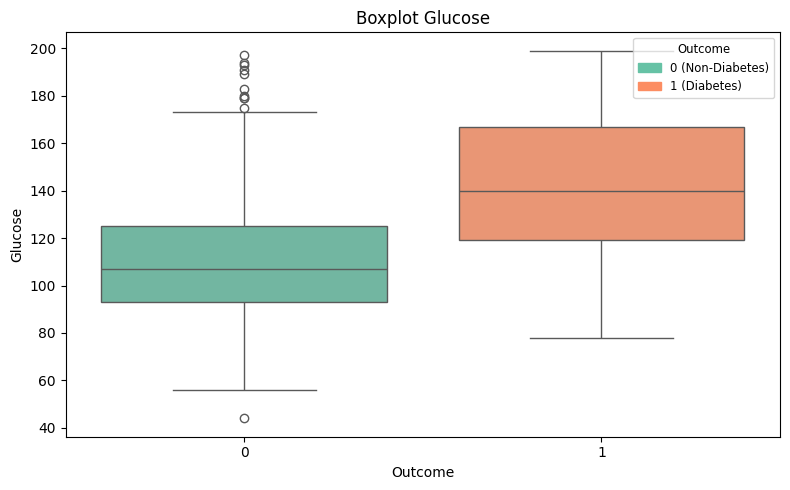

In [71]:

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Outcome', y='Glucose', palette='Set2')
plt.title('Boxplot Glucose')
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.tight_layout()
legend_labels = [
    mpatches.Patch(color='#66c2a5', label='0 (Non-Diabetes)'),
    mpatches.Patch(color='#fc8d62', label='1 (Diabetes)')
]
plt.legend(
    handles=legend_labels,
    title='Outcome',
    loc='upper right',
    fontsize='small',
    title_fontsize='small'
)
plt.show()

Kelompok diabetik (Outcome = 1) memiliki median glucose sekitar 140, jauh lebih tinggi dibandingkan kelompok non-diabetik (Outcome = 0) dengan median ±105. Sebaran glucose pada kelompok diabetik juga lebih tinggi (78–200), sedangkan kelompok non-diabetik berada pada rentang lebih rendah dengan beberapa outlier ekstrem.
Perbedaan ini menegaskan bahwa glucose merupakan indikator utama dalam membedakan individu dengan dan tanpa diabetes, serta menjadi variabel kunci dalam proses klasifikasi.


C:\Users\Rai\AppData\Local\Temp\ipykernel_10932\2909943019.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outcome', y='Pregnancies', palette='Set2')


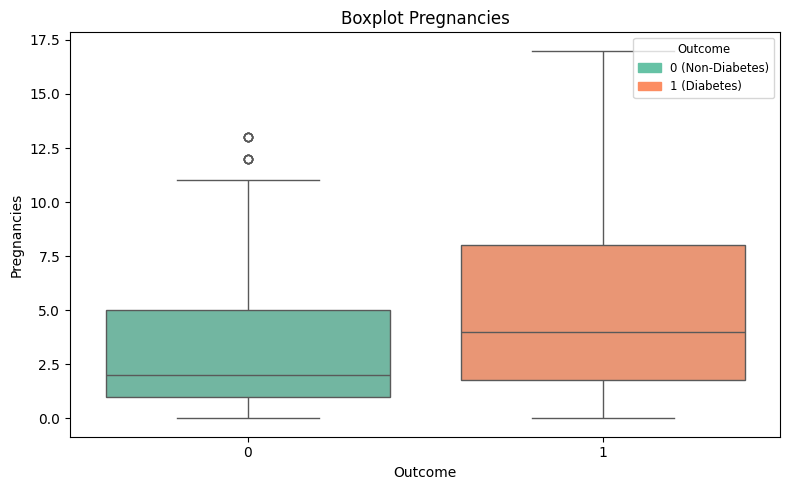

In [72]:

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Outcome', y='Pregnancies', palette='Set2')
plt.title('Boxplot Pregnancies')
plt.xlabel('Outcome')
plt.ylabel('Pregnancies')
plt.tight_layout()
legend_labels = [
    mpatches.Patch(color='#66c2a5', label='0 (Non-Diabetes)'),
    mpatches.Patch(color='#fc8d62', label='1 (Diabetes)')
]
plt.legend(
    handles=legend_labels,
    title='Outcome',
    loc='upper right',
    fontsize='small',
    title_fontsize='small'
)
plt.show()

Kelompok diabetik (Outcome = 1) memiliki median jumlah pregnancies lebih tinggi (±4) dibandingkan kelompok non-diabetik (Outcome = 0) dengan median sekitar 2. Sebaran pada kelompok diabetik lebih luas, dengan rentang interkuartil 2–8, sedangkan kelompok non-diabetik lebih sempit (1–5).
Meskipun terdapat outlier ekstrem (hingga 17 pada diabetik dan 13 pada non-diabetik), distribusi data menunjukkan bahwa individu dengan diabetes cenderung memiliki jumlah kehamilan lebih banyak dibandingkan non-diabetik.


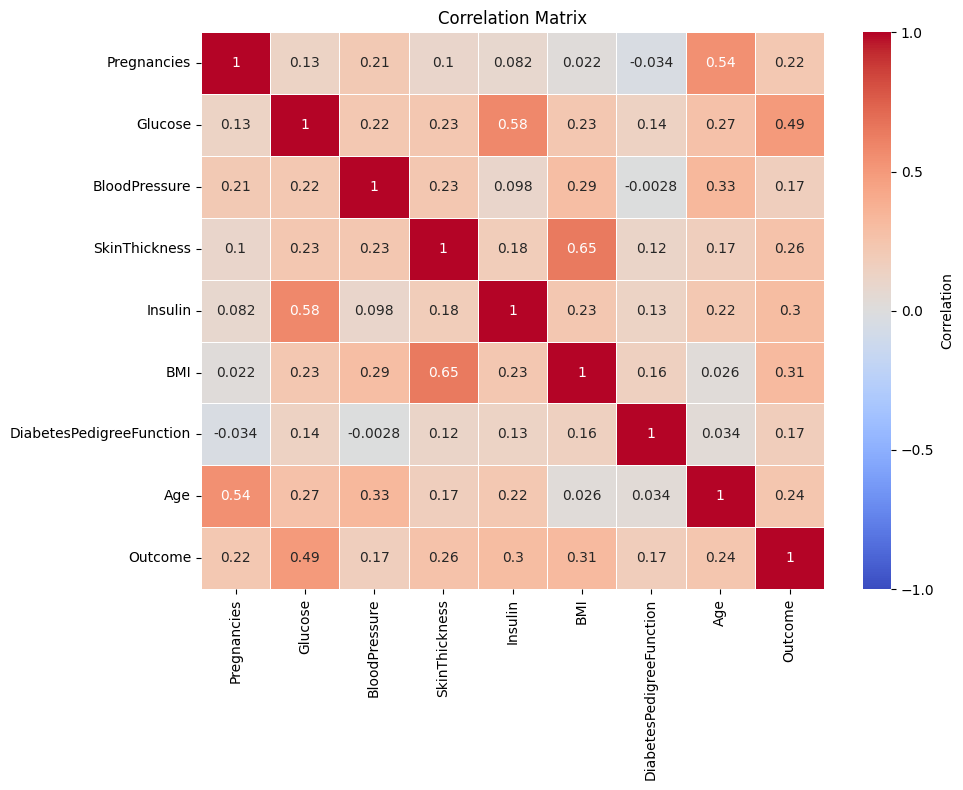

In [ ]:

corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    vmin=-1,  
    vmax=1    
)

colorbar = ax.collections[0].colorbar
colorbar.set_ticks([-1, -0.5, 0, 0.5, 1])
colorbar.set_label('Correlation')

plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

Hasil heatmap matriks korelasi menunjukkan bahwa glucose memiliki hubungan terkuat dengan outcome 0,49, menegaskan perannya sebagai indikator utama diabetes. Variabel BMI 0,31 dan insulin 0,30 juga berkorelasi cukup signifikan, sementara skin thickness, age, dan pregnancies menunjukkan korelasi lebih rendah namun tetap relevan. Sebaliknya, blood pressure dan diabetes pedigree function memiliki korelasi lemah sehingga kontribusinya terhadap klasifikasi relatif kecil.

In [74]:

df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [75]:

df = df.dropna()
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [76]:
#save df to csv file
df.to_csv('diabetez.csv', index=False)